In [7]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
#Load the Data
from google.colab import files
files.upload()

Saving HINDALCO_1D.xlsx - HINDALCO.csv to HINDALCO_1D.xlsx - HINDALCO (1).csv


{'HINDALCO_1D.xlsx - HINDALCO.csv': b'datetime,close,high,low,open,volume,instrument\r\n2014-01-24 00:00:00,114,115.35,113,113.15,5737135,HINDALCO\r\n2014-01-27 00:00:00,111.1,112.7,109.3,112,8724577,HINDALCO\r\n2014-01-28 00:00:00,113.8,115,109.75,110,4513345,HINDALCO\r\n2014-01-29 00:00:00,111.75,114.75,111.15,114.5,4713458,HINDALCO\r\n2014-01-30 00:00:00,108.1,110.7,107.6,110.2,5077231,HINDALCO\r\n2014-01-31 00:00:00,109.55,110,107,109.05,8287236,HINDALCO\r\n2014-02-03 00:00:00,103.45,109.4,103,109,5572627,HINDALCO\r\n2014-02-04 00:00:00,102.45,103.45,99.8,102,13935173,HINDALCO\r\n2014-02-05 00:00:00,104.25,105.15,101,102.4,9106760,HINDALCO\r\n2014-02-06 00:00:00,105.75,106.5,103.1,104.65,10194884,HINDALCO\r\n2014-02-07 00:00:00,106.4,107.7,104.75,106.15,9650511,HINDALCO\r\n2014-02-10 00:00:00,106.8,107.7,105.8,106.45,3124538,HINDALCO\r\n2014-02-11 00:00:00,104.55,107.1,104.25,106.9,3964390,HINDALCO\r\n2014-02-12 00:00:00,103.5,105.6,103.05,105.15,5325176,HINDALCO\r\n2014-02-13 00:0

In [9]:
#Store the Data
df = pd.read_csv('HINDALCO_1D.xlsx - HINDALCO.csv')
#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['datetime'].values))

In [10]:
df

,datetime,close,high,low,open,volume,instrument
2014-01-24,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO
2014-01-27,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO
2014-01-28,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO
2014-01-29,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO
2014-01-30,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO
...,...,...,...,...,...,...,...
2018-12-21,2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO
2018-12-24,2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO
2018-12-26,2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO
2018-12-27,2018-12-27 00:00:00,220.60,223.90,219.60,221.40,7947144,HINDALCO


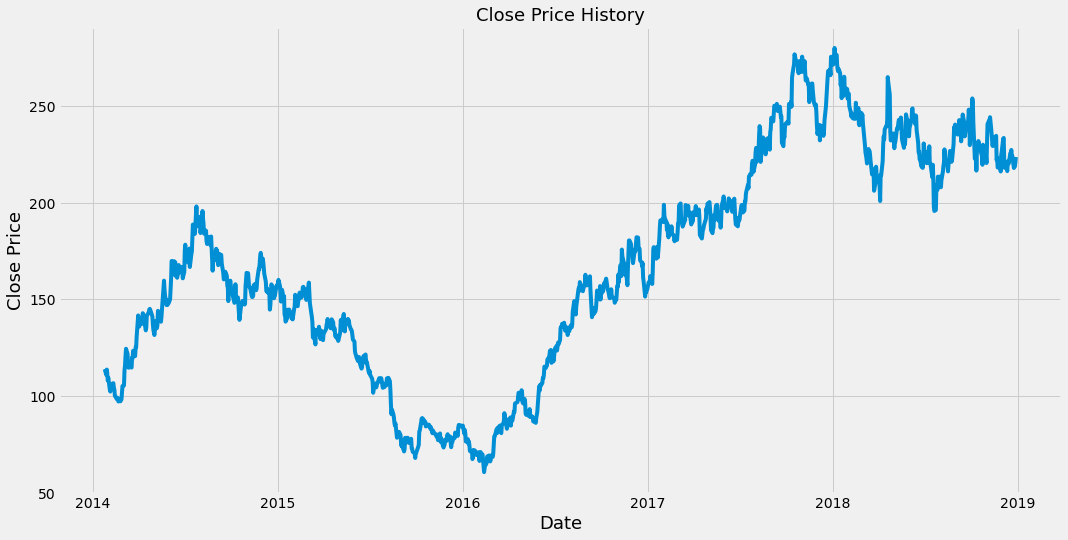

In [11]:
#Visually Show the Close Price
plt.figure(figsize=(16,8))
plt.title('Close Price History',fontsize=18)
plt.plot(df['close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

# **SMA Strategy**

In [12]:
#Create a function to calculate Simple Moving Average(SMA)
def SMA(data, period = 30, column='close'):
  return data[column].rolling(window=period).mean()


In [13]:
#Create two columns to store 20-day and 50-day SMA
df['SMA20']=SMA(df,20)
df['SMA50']=SMA(df,50)

In [14]:
#Get the buy and sell signals
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()

df['Buy'] = np.where(df['Position'] == 1, df['close'], np.NAN)
df['Sell'] = np.where(df['Position'] == -1, df['close'], np.NAN)

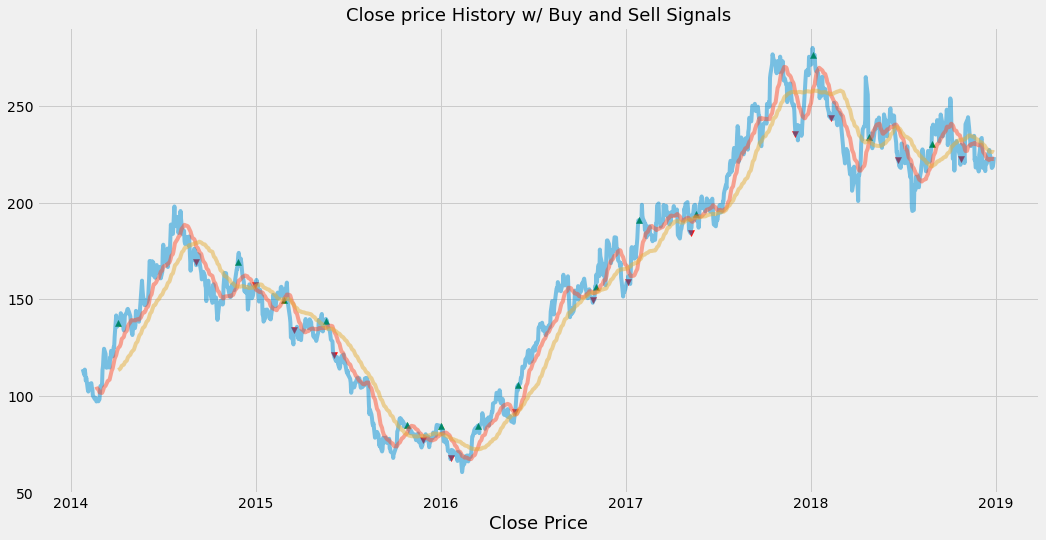

In [15]:
#Visually show the close price with SMAs and Buy & Sell Signals
plt.figure(figsize=(16,8))
plt.title('Close price History w/ Buy and Sell Signals', fontsize=18)
plt.plot(df['close'], alpha=0.5, label='Close')
plt.plot(df['SMA20'], alpha=0.5, label='SMA20')
plt.plot(df['SMA50'], alpha=0.5, label='SMA50')
plt.scatter(df.index, df['Buy'], alpha=1, label='Buy Signal', marker='^', color='green')
plt.scatter(df.index, df['Sell'], alpha=1, label='Sell Signal', marker='v', color='red')
plt.xlabel('Date', fontsize=18)
plt.xlabel('Close Price', fontsize=18)
plt.show()


# **MACD Strategy**

In [16]:
#Calculate the MACD and signal line indicators
#Calculate the short term EMA
ShortEMA = df.close.ewm(span=12, adjust=False).mean()
#Calculate the long term EMA
LongEMA = df.close.ewm(span=26, adjust=False).mean()
#Calculate the MACD line
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()





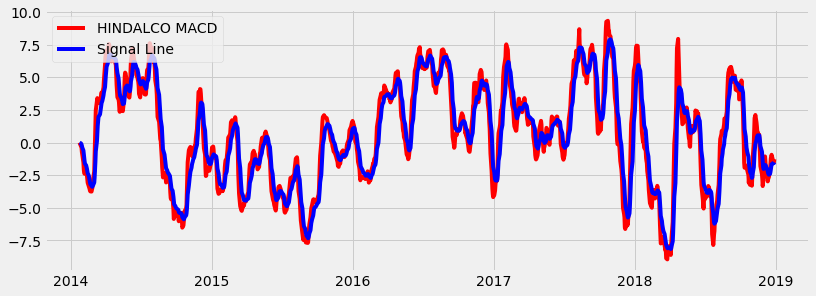

In [17]:
#Plot the chart
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index, MACD, label='HINDALCO MACD', color='red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.legend(loc='upper left')
plt.show()

In [18]:
#Create new columns for the data
df['MACD'] = MACD
df['Signal Line'] = signal
df

,datetime,close,high,low,open,volume,instrument,SMA20,SMA50,Signal,Position,Buy,Sell,MACD,Signal Line
2014-01-24,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO,NaN,NaN,0,NaN,NaN,NaN,0.000000,0.000000
2014-01-27,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,-0.231339,-0.046268
2014-01-28,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,-0.194567,-0.075928
2014-01-29,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,-0.327072,-0.126156
2014-01-30,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,-0.718327,-0.244591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO,222.5775,226.302,0,0.0,NaN,NaN,-0.930304,-1.662343
2018-12-24,2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO,222.5300,226.121,0,0.0,NaN,NaN,-1.306828,-1.591240
2018-12-26,2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO,222.4650,226.163,0,0.0,NaN,NaN,-1.527103,-1.578413
2018-12-27,2018-12-27 00:00:00,220.60,223.90,219.60,221.40,7947144,HINDALCO,222.6925,226.041,0,0.0,NaN,NaN,-1.522737,-1.567278


In [19]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag!=1:
        Buy.append(signal['close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)

      if flag!=0:
        Sell.append(signal['close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy,Sell)


      

    

In [20]:
#Create buy and sell columns
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [21]:
#Show the data
df

,datetime,close,high,low,open,volume,instrument,SMA20,SMA50,Signal,Position,Buy,Sell,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2014-01-24,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO,NaN,NaN,0,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
2014-01-27,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,-0.231339,-0.046268,NaN,111.1
2014-01-28,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,-0.194567,-0.075928,NaN,NaN
2014-01-29,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,-0.327072,-0.126156,NaN,NaN
2014-01-30,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO,NaN,NaN,0,0.0,NaN,NaN,-0.718327,-0.244591,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO,222.5775,226.302,0,0.0,NaN,NaN,-0.930304,-1.662343,NaN,NaN
2018-12-24,2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO,222.5300,226.121,0,0.0,NaN,NaN,-1.306828,-1.591240,NaN,NaN
2018-12-26,2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO,222.4650,226.163,0,0.0,NaN,NaN,-1.527103,-1.578413,NaN,NaN
2018-12-27,2018-12-27 00:00:00,220.60,223.90,219.60,221.40,7947144,HINDALCO,222.6925,226.041,0,0.0,NaN,NaN,-1.522737,-1.567278,NaN,NaN


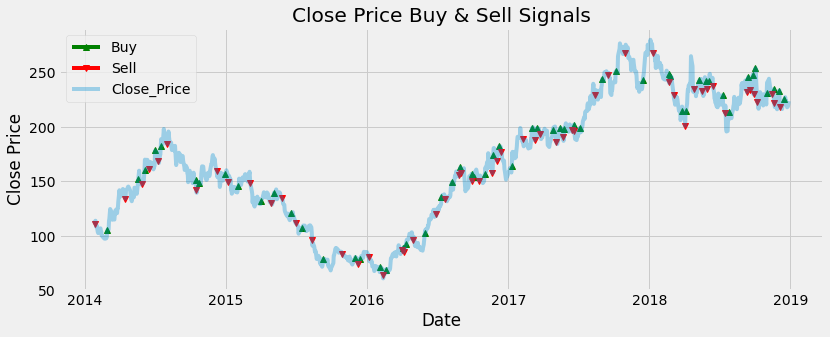

In [22]:
#Visually show the stock buy and sell signals
plt.figure(figsize=(12.2,4.5))
plt.plot(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.plot(df.index, df['Sell_Signal_Price'], color='red', label='Sell',marker='v', alpha=1)
plt.plot(df['close'], label='Close_Price', alpha=0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc = 'upper left')
plt.show()
